In [2]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *
from models import make_model
import porepy as pp


model = make_model(
    {
        "physics": 1,
        "geometry": 1,
        "barton_bandis_stiffness_type": 2,
        "friction_type": 1,
        "grid_refinement": 6,
        "solver": 2,
    }
)
model.prepare_simulation()
model.before_nonlinear_loop()
model.before_nonlinear_iteration()
model.assemble_linear_system()
mat, rhs, state, iterate, dt = load_matrix_rhs_state_iterate_dt(load_data(f'../stats/{model.simulation_name()}.json'), 18)
model.linear_system = mat, rhs
model.bmat.mat = mat
model.bmat.plot_max()



Sim time: 0, Dt: 0.5
sticking: 24, sliding: 0, open: 0


IsADirectoryError: [Errno 21] Is a directory: '../matrices'

In [25]:
model.bmat.shape

(26745, 26745)

Solve  took: 1.0
True residual permuted: 3.900630519013547e-06
True residual: 3.900630478035181e-06
PETSc Converged Reason: -3
lambda min: 0.013492004482346215


{'mat_Q': BlockMatrixStorage of shape (26745, 26745) with 1016185 elements with 6x6 active groups,
 'rhs_Q': array([-1.23435037e-05, -0.00000000e+00, -3.06821976e-05, ...,
         2.24612849e-16,  3.39879888e-16, -4.70892175e-16]),
 'prec': <mat_utils.FieldSplit at 0x7e93c037e850>}

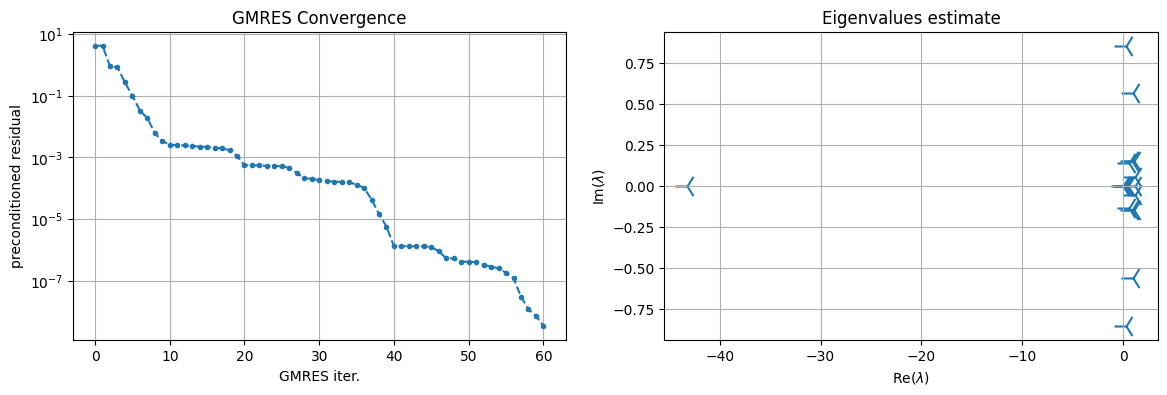

In [24]:
from pp_utils import make_solver_schema


solve_petsc_new(model.bmat, make_solver_schema(model), rhs, Qright=model.Qright())